In [3]:
# Import Libraries
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [6]:
# Define global variables from specification
N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6

# Question 1
## Question 1.1

In [8]:
# Variables for Question 1.1
AV = np.array([0, 20, 0, 0, 0, 0])
IV = np.array([30, 34, 60, 40, 40, 40])
duration1 = np.array([15, 20, 25, 15, 20, 25])

In [40]:
TC = np.array([([0] * AV[i] + (([1] * duration1[i] + [0] * (IV[i] - duration1[i])) * int(N / IV[i])))[0 : N] for i in range(nsrcs)], dtype = object)

for i in range(nsrcs):
    TC[i] = ((TC[i] - np.mean(TC[i])) / np.std(TC[i]))

TC = TC.astype(float)

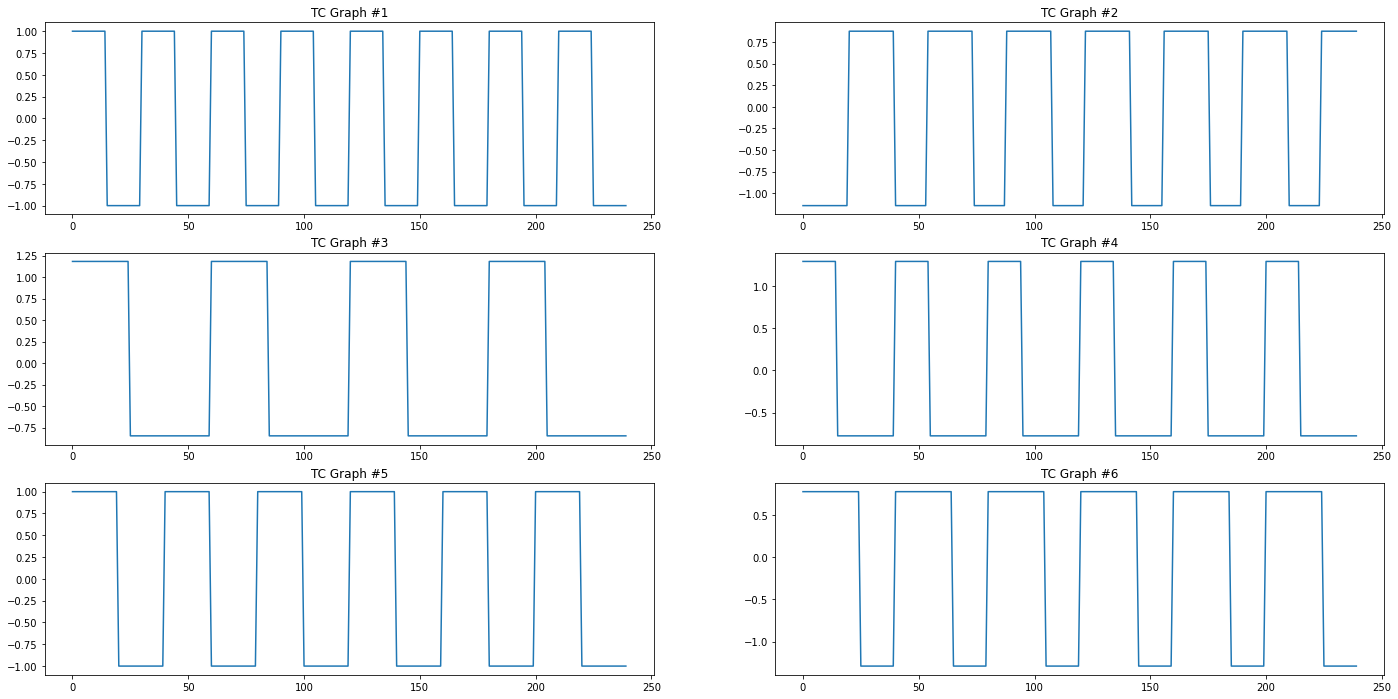

In [52]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (24, 12))

axis = [ax1, ax2, ax3, ax4, ax5, ax6]


for i in range(nsrcs):
    
    axis[i].plot(range(N), TC[i])
    
    axis[i].set_title(f"TC Graph #{i + 1}")
    
    
#plt.savefig("../plots/Q1.1_TC.png")
plt.show()

## Question 1.2

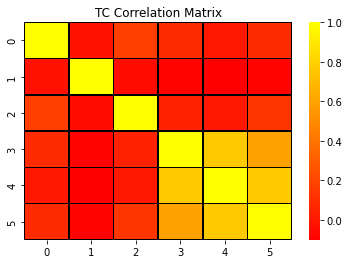

In [59]:
sns.heatmap(np.corrcoef(TC), linewidths = 0.5, cmap = "autumn", linecolor = "black").set_title("TC Correlation Matrix")
plt.savefig("../plots/Q1.2_CorrelationMatrix.png")

## Question 1.3

In [101]:
# Variables for Question 1.3
SM = [np.zeros((x1, x2)) for i in range(nsrcs)]
slices = [((2, 6), (2, 6)), ((2, 6), (15, 19)), ((8, 13), (2, 6)), ((8, 13), (15, 19)), ((15, 19), (2, 6)), ((15, 19), (15, 19))]

In [102]:
for i in range(nsrcs):
    for j in range(slices[i][0][0] - 1, slices[i][0][1]):
        for k in range(slices[i][1][0] - 1, slices[i][1][1]):
            SM[i][j][k] = 1

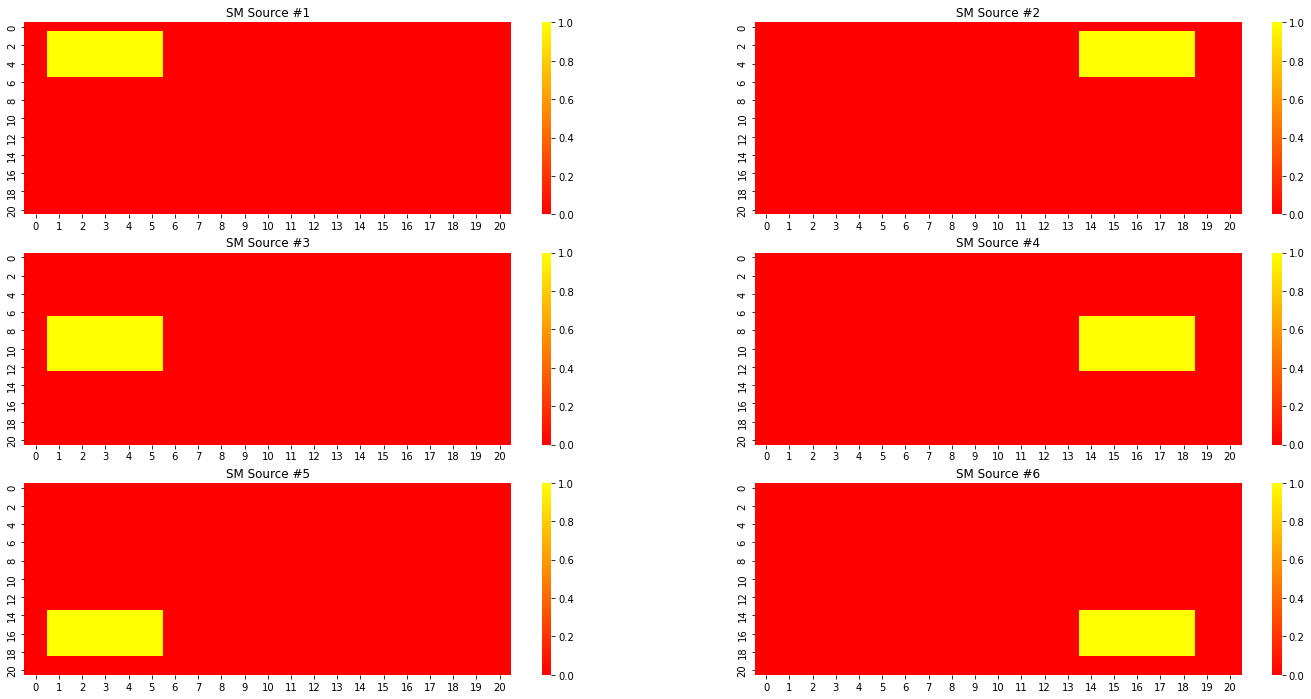

In [107]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (24, 12))

axis = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(nsrcs):
    sns.heatmap(SM[i], cmap = "autumn", ax = axis[i])
    axis[i].set_title(f"SM Source #{i + 1}")
    
plt.savefig("../plots/Q1.3_SM Source.png")

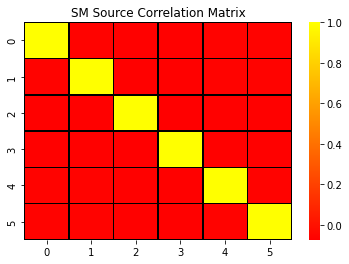

In [117]:
sns.heatmap(np.corrcoef([SM[i].flatten() for i in range(nsrcs)]), linewidths = 0.5, cmap = "autumn", linecolor = "black").set_title("SM Source Correlation Matrix")
plt.savefig("../plots/Q1.3 SM Source CM.png")

## Question 1.4

In [119]:
# Variables for Question 1.4
Tt_var = 0.25
Ts_var = 0.015
seed = 420

In [125]:
np.random.seed(seed)
Tt = np.random.normal(scale = np.sqrt(Tt_var), size = (N, nsrcs))
Ts = np.random.normal(scale = np.sqrt(Ts_var), size = (nsrcs, V))

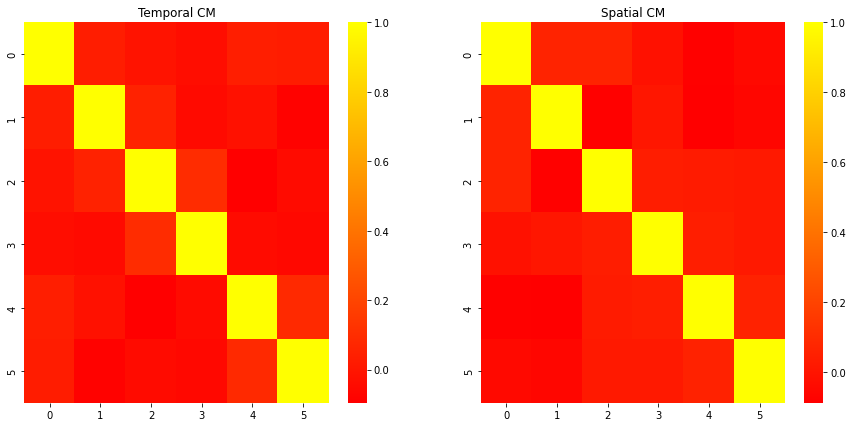

In [132]:
fig1, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15, 7))

sns.heatmap(np.corrcoef(Tt.transpose()), cmap = "autumn", ax = ax1)
ax1.set_title(f"Temporal CM")

sns.heatmap(np.corrcoef(Ts), cmap = "autumn", ax = ax2)
ax2.set_title(f"Spatial CM")

plt.savefig("../plots/Q1.4 Temporal and Spatial CM.png")

C:\Users\nonam\AppData\Local\Temp/ipykernel_74348/3241490822.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


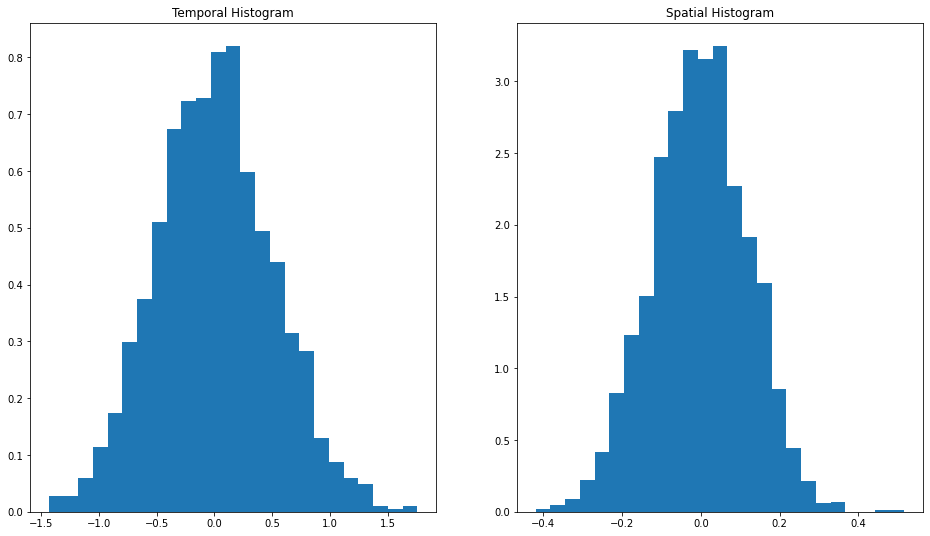

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9))

ax1.hist(Tt.flatten(), bins = 25, density = True)
ax1.set_title("Temporal Histogram")
ax2.hist(Ts.flatten(), bins = 25, density = True)
ax2.set_title("Spatial Histogram")

fig.show()
plt.savefig("../plots/Q1.4 Temporal and Spatial Histogram.png")

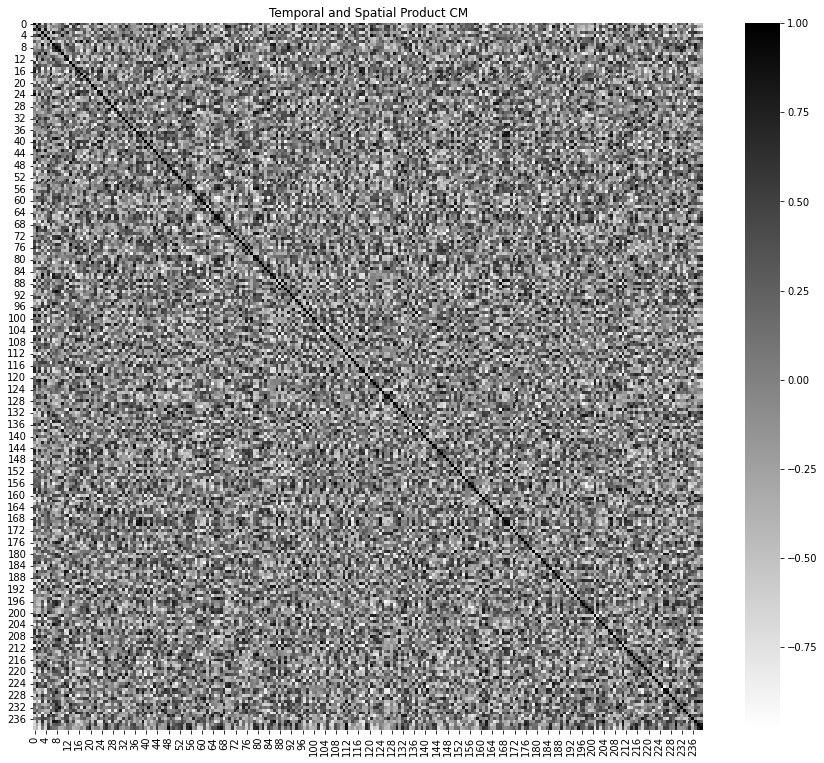

In [140]:
plt.figure(figsize=(15, 13))

sns.heatmap(np.corrcoef(np.matrix(Tt) * np.matrix(Ts)), cmap = "binary").set_title(f"Temporal and Spatial Product CM")
plt.savefig("../plots/Q1.4 Temporal and Spatial Product CM.png")

## Question 1.5

In [148]:
sample_size = 100

In [147]:
X = (np.matrix(TC).transpose() + np.matrix(Tt)) * ([tmpSM.transpose().flatten() for tmpSM in SM] + Ts)
X

matrix([[ 0.58815081, -0.37415462, -0.59542733, ...,  0.54129158,
          0.63871318, -0.63521466],
        [ 0.46798832, -0.0829004 , -0.53277882, ...,  0.30190429,
          0.44979568, -0.36616032],
        [ 0.7112429 , -0.29360446, -0.54095861, ...,  0.460516  ,
          0.56299361, -0.64498684],
        ...,
        [-0.69290357,  0.04007512,  0.49904708, ..., -0.66040549,
         -0.60973122,  0.60614603],
        [-0.52335902,  0.11156532,  0.54774006, ..., -0.40571904,
         -0.5163668 ,  0.51878351],
        [-0.59050899,  0.17964647,  0.33807708, ..., -0.30370758,
         -0.42509797,  0.57729721]])

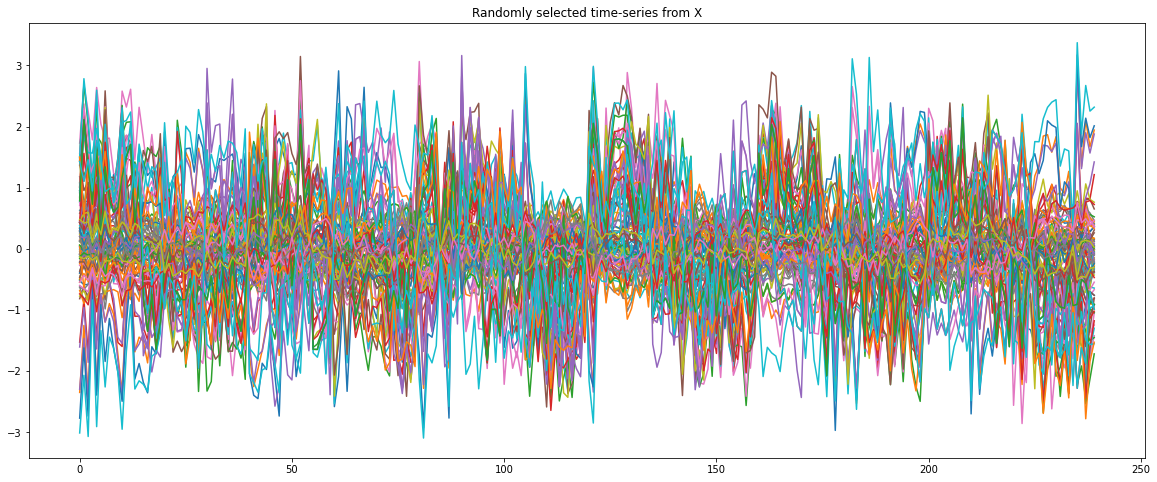

In [151]:
samples = np.random.randint(V, size = sample_size)

fig, ax = plt.subplots(figsize = (20, 8))
plt.plot(X[:, samples])
plt.title("Randomly selected time-series from X")
plt.savefig("../plots/Q1.5 Randomly selected time-series.png")
plt.show()

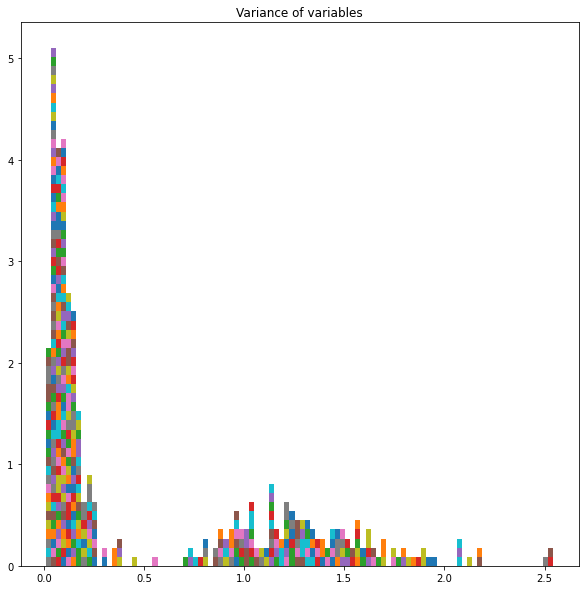

In [155]:
fig, ax = plt.subplots(figsize = (10,10))

plt.hist(np.var(X, axis = 0), bins = 100, density = True, stacked = True)
plt.title("Variance of variables")
plt.savefig("../plots/Q1.5 Variable variance.png")
plt.show()